# Task-2 : Explore Supervised Machine Learning with Student's scores Dataset

## 1) Sklearn Implementation

### Libraries loading

In [26]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### import data

In [4]:
df = pd.read_csv('student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### visualizing dataset 

<IPython.core.display.Javascript object>


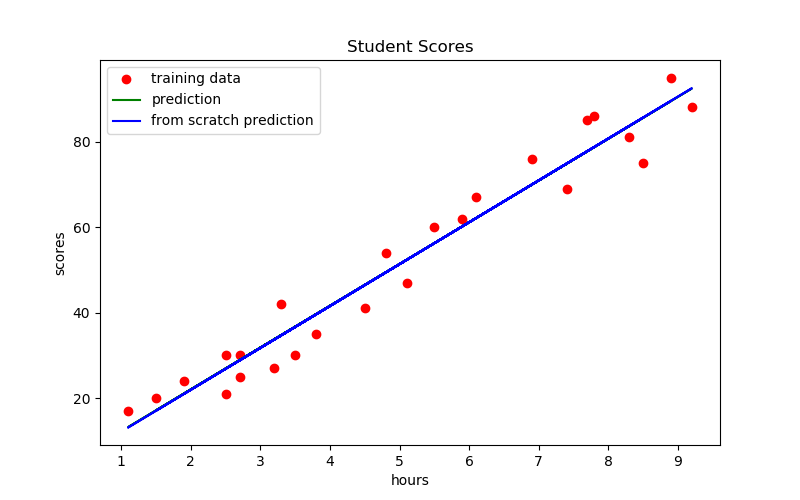

In [118]:
plt.figure(figsize = (8,5))
plt.title("Student Scores")
plt.plot(df['Hours'],df['Scores'],'ro',label="training data")
plt.xlabel('hours')
plt.ylabel('scores')
plt.legend()

### Train with Linear Regression Model

In [119]:
m = len(df['Hours'])
X_train,y_train = np.array(df['Hours']).reshape(m,1), np.array(df['Scores']).reshape(m,1)
linreg = LinearRegression().fit(X_train,y_train)


In [120]:
#Extra
print("theta",linreg.coef_)
print("intercept",linreg.intercept_)
print("accuracy on given dataset",linreg.score(X_train,y_train))

theta [[9.77580339]]
intercept [2.48367341]
accuracy on given dataset 0.9529481969048356


### Visualize Prediction Line
#### Y = theta*X + intercept

In [121]:
#Y = theta*x + intercept
theta = linreg.coef_
c = linreg.intercept_
plt.plot(X_train,np.multiply(theta,X_train)+c,'g-',label='prediction')
plt.legend()

### Final Prediction

In [51]:
final_prediction = linreg.predict(np.array([9.25]).reshape(1,1))[0][0]
print("Predicted scores on 9.25 hours study:",final_prediction)

Predicted scores on 9.25 hours study: 92.90985477015731


(25,)

## 2) Linear Regression Implementation from Scratch

In [132]:
m, n = df['Hours'].shape[0], 1
X_train, y_train = np.array(df['Hours']).reshape(m,n), np.array(df['Scores']).reshape(m,n)


### Linear Regression Algorithm:
#### 1)initialize parameters such as theta and b 
#### 2) for i = 0 to iterations:
            Apply Gradient decent
            compute gradients of cost wrt theta and b
            theta = theta - learing_rate*(dJ/dtheta)/m,    b = b - learning_rate*(dJ/db)/m
            compute cost just for checking whether it is strictly decreasing or not        
#### 3) now you have final parameters theta and b, so make your predict function, hx = theta*X + b

In [149]:
def initialize_parameters(n):
    parameters = {}
    parameters['theta'] = np.zeros((1,n))
    parameters['b'] = np.zeros((1,1))
    return parameters

def hx(X,parameters):
    theta = parameters['theta']
    b = parameters['b']
    return np.dot(X,theta.T) + b

def compute_cost(X,y,parameters):
    h = hx(X,parameters)
    m = X.shape[0]
    J = sum(np.square(h-y))*0.5/m
    return J

def compute_grads(X,y,parameters):
    h = hx(X,parameters)
    m = X.shape[0]
    grads = {}
    dw = np.dot(X.T,h-y)/m
    db = sum((h - y))/m
    grads['dw'] = dw
    grads['db'] = db
    return grads

def score(X,y,parameters):
    h = hx(X,parameters)
    return 100-np.mean(np.abs(h-y))

def update_parameters(parameters,grads,learning_rate):
    parameters['theta'] -= learning_rate*grads['dw']
    parameters['b'] -= learning_rate*grads['db']
    return parameters
    

In [150]:
def LinearRegressionModel(X,y,parameters,learning_rate,iterations):
    plt.figure()
    plt.title("Cost vs iterations")
    plt.xlabel("iterations")
    plt.ylabel("cost")
    Jall = []
    for each in range(1,iterations+1):
        grads = compute_grads(X,y,parameters)
        parameters = update_parameters(parameters,grads,learning_rate)
        J = compute_cost(X,y,parameters)
        Jall.append(J)
        if each%20 == 0:
            print("Cost at every 20th iteration {} : {}\n".format(each+1,J,))
            
            
    plt.plot(range(iterations),Jall,label="cost")          
    plt.legend()        
    return parameters

<IPython.core.display.Javascript object>


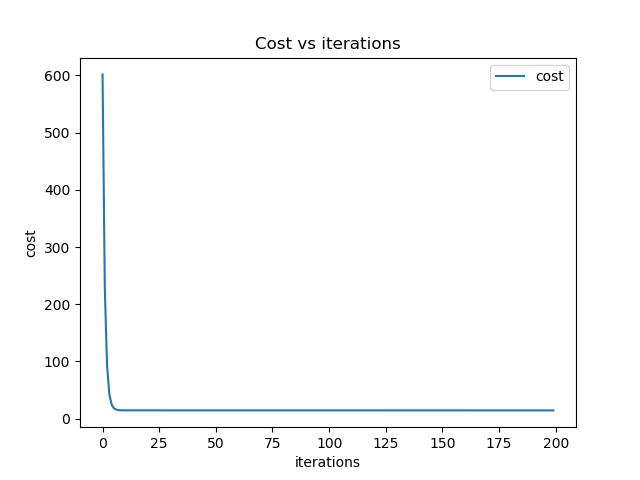

Cost at every 20th iteration 21 : [14.49337736]

Cost at every 20th iteration 41 : [14.47679761]

Cost at every 20th iteration 61 : [14.46550412]

Cost at every 20th iteration 81 : [14.45781025]

Cost at every 20th iteration 101 : [14.45256868]

Cost at every 20th iteration 121 : [14.44899777]

Cost at every 20th iteration 141 : [14.44656503]

Cost at every 20th iteration 161 : [14.44490769]

Cost at every 20th iteration 181 : [14.44377859]

Cost at every 20th iteration 201 : [14.44300938]



In [151]:
n = 1
para = initialize_parameters(n)
para = LinearRegressionModel(X_train,y_train,para,0.05,200)

In [152]:
print("Accuracy in traing set is",score(X_train,y_train,para),"%")
print("theta",para['theta'])
print("intercept",para['b'])

Accuracy in traing set is 95.01825747242448 %
theta [[9.796713]]
intercept [[2.35413469]]


<IPython.core.display.Javascript object>


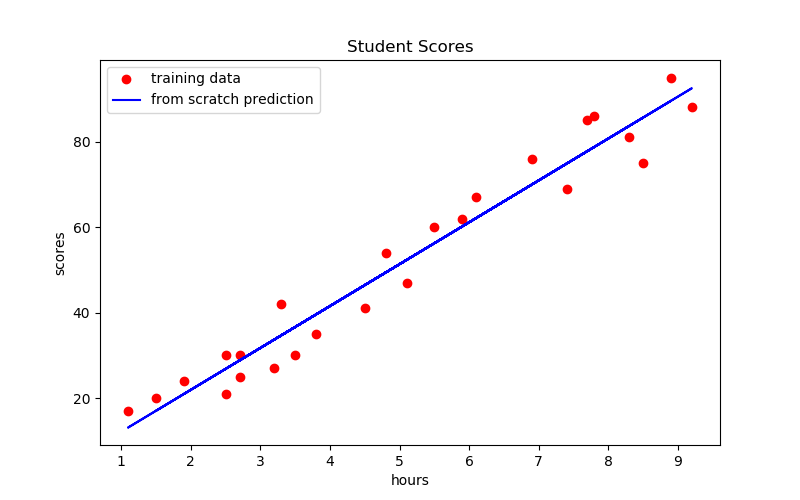

In [153]:
plt.figure(figsize = (8,5))
plt.title("Student Scores")
plt.plot(df['Hours'],df['Scores'],'ro',label="training data")
plt.plot(X_train,hx(X_train,para),'b-',label="from scratch prediction")
plt.xlabel('hours')
plt.ylabel('scores')
plt.legend()

In [140]:
final_prediction = hx(np.array([9.25]).reshape(1,1),para)[0][0]
print("Predicted scores on 9.25 hours study:",final_prediction)

Predicted scores on 9.25 hours study: 92.97372998183242
